In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

# Actividad de práctica

Vamos a hacer una actividad muy simple. Para ello vamos a descargar el dataset de comunas en santiago 

https://www.bcn.cl/siit/mapas_vectoriales

y lo que haremos será cruzar el mapa con otra tabla de datos, es decir, vamos a posicionar valores de una tabla de datos en el mapa para ver la ubicación de estos.



In [2]:
df_casas = pd.read_csv(r'datos_ejercicio/casas.csv', sep=';')
df_casas['latitude'] = df_casas['latitude']/10
df_casas['longitude'] = df_casas['longitude']/10
df_casas

,COD,ID,latitude,longitude
0,154557,2AC7ZESPWROOM02,-33.4791,-70.6069
1,152632,2AC7ZESPWROOM02,-33.5135,-70.7159
2,154703,2AC7ZESPWROOM02,-33.5228,-70.7717
3,154699,2AC7ZESPWROOM02,-33.5396,-70.6468
4,154561,2AC7ZESPWROOM02,-33.5021,-70.6559
5,154563,2AC7ZESPWROOM02,-33.4915,-70.6186
6,151572,2AC7ZESPWROOM02,-33.4911,-70.5979
7,153560,Matias G,-33.4712,-70.5891
8,154697,2AC7ZESPWROOM02,-33.4712,-70.5891
9,36051,La Reina,-33.4674,-70.5854


## Ahora vamos a cargar el mapa vectorial de las comunas. Estos datos que descargaste al descomprimirlos deberían quedar guardados en una carpeta llamada Comunas. Traslada esa carpeta a la carpeta datos_ejercicio para poder cargarlos aquí.

In [3]:
gdf = gpd.read_file('datos_ejercicio/Comunas/comunas.shp')
gdf

,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,geometry
0,48,170038.624165,16,8,6204,6,9.685774e+08,206184.271675,Región del Libertador Bernardo O'Higgins,Marchigüe,Cardenal Caro,"POLYGON ((-7992818.789 -4056669.319, -7992731...."
1,29,125730.104795,15,8,6102,6,4.157446e+08,151911.576827,Región del Libertador Bernardo O'Higgins,Codegua,Cachapoal,"POLYGON ((-7831651.813 -4022443.109, -7831596...."
2,30,63026.084422,15,8,6103,6,1.448565e+08,76355.326122,Región del Libertador Bernardo O'Higgins,Coinco,Cachapoal,"POLYGON ((-7892616.357 -4060673.364, -7892621...."
3,31,89840.903562,15,8,6104,6,3.256572e+08,108874.623150,Región del Libertador Bernardo O'Higgins,Coltauco,Cachapoal,"POLYGON ((-7906457.717 -4051723.734, -7906266...."
4,78,122626.493264,23,11,9121,9,6.990727e+08,156680.410681,Región de La Araucanía,Cholchol,Cautín,"POLYGON ((-8121756.186 -4645860.295, -8121644...."
...,...,...,...,...,...,...,...,...,...,...,...,...
341,255,130240.555805,19,10,16305,16,8.751006e+08,160459.137929,Región de Ñuble,San Nicolás,Punilla,"POLYGON ((-8041950.854 -4349201.562, -8041735...."
342,253,311061.932415,19,10,16304,16,2.393007e+09,388109.613857,Región de Ñuble,San Fabián,Punilla,"POLYGON ((-7931328.549 -4363544.179, -7931320...."
343,245,159257.906431,19,10,16303,16,7.638173e+08,195593.933727,Región de Ñuble,Ñiquén,Punilla,"POLYGON ((-8026032.185 -4319505.012, -8025933...."
344,243,157467.049667,19,10,16104,16,1.044405e+09,196962.664313,Región de Ñuble,El Carmen,Ñuble,"POLYGON ((-7986315.104 -4415272.935, -7986309...."


## Vamos a filtrar de modo que solo nos quedamos con las columnas que nos interesan. En este caso nos vamos a quedar con las comunas y los polígonos, tal que la región sea la metropolitana.

In [4]:
comunas_rm = gdf[gdf['Region'] == 'Región Metropolitana de Santiago'].reset_index()
comunas_rm = comunas_rm.to_crs(epsg=4326)
comunas_rm = comunas_rm[['Comuna', 'geometry']]
comunas_rm

,Comuna,geometry
0,San Joaquín,"POLYGON ((-70.62342 -33.47338, -70.62292 -33.4..."
1,San Miguel,"POLYGON ((-70.63659 -33.51873, -70.63740 -33.5..."
2,San Ramón,"POLYGON ((-70.63811 -33.51868, -70.63740 -33.5..."
3,Independencia,"POLYGON ((-70.65817 -33.39914, -70.65827 -33.3..."
4,La Cisterna,"POLYGON ((-70.65286 -33.54761, -70.65320 -33.5..."
5,Peñalolén,"POLYGON ((-70.54171 -33.51253, -70.54201 -33.5..."
6,Providencia,"POLYGON ((-70.58484 -33.43126, -70.58445 -33.4..."
7,La Reina,"POLYGON ((-70.53908 -33.42893, -70.53909 -33.4..."
8,Calera de Tango,"POLYGON ((-70.76349 -33.57464, -70.76323 -33.5..."
9,Colina,"POLYGON ((-70.78144 -33.18503, -70.78177 -33.1..."


## Ahora vamos a plotear el gráfico

## Ahora plottea el mapa actualizado.

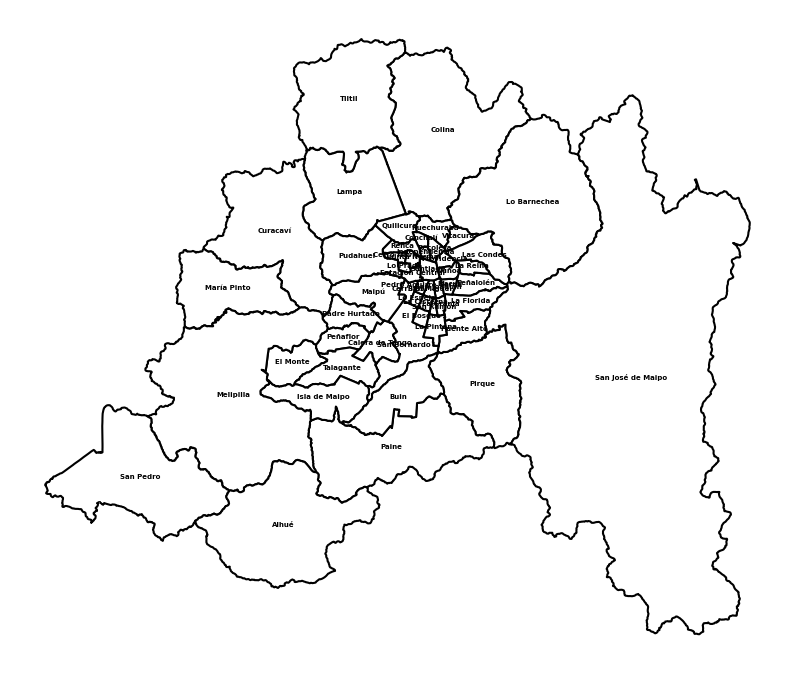

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Esta parte dibuja el mapa de la comuna
comunas_rm.plot(ax=ax, color='white', edgecolor='black', linewidth=1.5)

# Esta parte mete el nombre de las comunas 
for idx, row in comunas_rm.iterrows():
    # El centroide de cada comuna
    centroid = row['geometry'].centroid
    # Añadimos la etiqueta de la comuna
    ax.annotate(text=row['Comuna'], xy=(centroid.x, centroid.y),
                ha='center', fontsize=5, color='black', fontweight='bold')

# Quitamos el eje para que el mapa se vea más limpio
ax.axis('off')

# Mostramos el mapa
plt.show()


## Ahora el desafío es que puedas posicionar los puntos del datsaset de casas en el plot. Puedes basarte en el código anterior.

## Para mejorar la visibilidad de los puntos, no imprimas el nombre de las comunas. 





#### Paso 1: Convertir el dataset de casas a formato geopandas.

Para ello debes usar [Points from XY](https://geopandas.org/en/stable/docs/reference/api/geopandas.points_from_xy.html)

In [6]:
df_casas_geopandas = gpd.GeoDataFrame(df_casas, geometry=gpd.points_from_xy(df_casas['longitude'], df_casas['latitude']))
df_casas_geopandas

,COD,ID,latitude,longitude,geometry
0,154557,2AC7ZESPWROOM02,-33.4791,-70.6069,POINT (-70.60690 -33.47910)
1,152632,2AC7ZESPWROOM02,-33.5135,-70.7159,POINT (-70.71590 -33.51350)
2,154703,2AC7ZESPWROOM02,-33.5228,-70.7717,POINT (-70.77170 -33.52280)
3,154699,2AC7ZESPWROOM02,-33.5396,-70.6468,POINT (-70.64680 -33.53960)
4,154561,2AC7ZESPWROOM02,-33.5021,-70.6559,POINT (-70.65590 -33.50210)
5,154563,2AC7ZESPWROOM02,-33.4915,-70.6186,POINT (-70.61860 -33.49150)
6,151572,2AC7ZESPWROOM02,-33.4911,-70.5979,POINT (-70.59790 -33.49110)
7,153560,Matias G,-33.4712,-70.5891,POINT (-70.58910 -33.47120)
8,154697,2AC7ZESPWROOM02,-33.4712,-70.5891,POINT (-70.58910 -33.47120)
9,36051,La Reina,-33.4674,-70.5854,POINT (-70.58540 -33.46740)


In [7]:
df_casas_geopandas.set_crs(epsg=4326, inplace=True)


,COD,ID,latitude,longitude,geometry
0,154557,2AC7ZESPWROOM02,-33.4791,-70.6069,POINT (-70.60690 -33.47910)
1,152632,2AC7ZESPWROOM02,-33.5135,-70.7159,POINT (-70.71590 -33.51350)
2,154703,2AC7ZESPWROOM02,-33.5228,-70.7717,POINT (-70.77170 -33.52280)
3,154699,2AC7ZESPWROOM02,-33.5396,-70.6468,POINT (-70.64680 -33.53960)
4,154561,2AC7ZESPWROOM02,-33.5021,-70.6559,POINT (-70.65590 -33.50210)
5,154563,2AC7ZESPWROOM02,-33.4915,-70.6186,POINT (-70.61860 -33.49150)
6,151572,2AC7ZESPWROOM02,-33.4911,-70.5979,POINT (-70.59790 -33.49110)
7,153560,Matias G,-33.4712,-70.5891,POINT (-70.58910 -33.47120)
8,154697,2AC7ZESPWROOM02,-33.4712,-70.5891,POINT (-70.58910 -33.47120)
9,36051,La Reina,-33.4674,-70.5854,POINT (-70.58540 -33.46740)


### Paso 2: graficar los puntos en el mapa

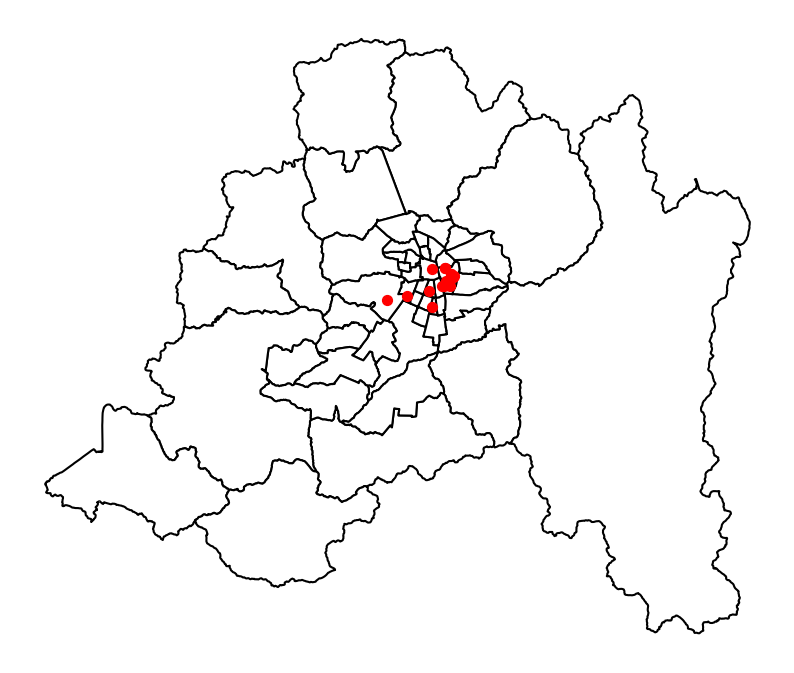

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Dibujar el mapa de comunas
comunas_rm.plot(ax=ax, color='white', edgecolor='black', linewidth=1.5)

# Dibujar el segundo dataset con los puntos (MarkerSize detedermina el tamaño de los puntos)
df_casas_geopandas.plot(ax=ax, marker='o', color='red', markersize=50, label='Puntos')

ax.axis('off')

plt.show()

